In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [71]:
def plot_errsig_2(dw_range, phasediff, loss, r=np.sqrt(0.95), nfiber=1.5, Lfiber=2, c=2.998e8):
    # dw_range is MHz
    para1 = r - (1 - r**2) * (np.exp(-1j*nfiber*dw_range*Lfiber/c*1e6)) / (1 - r*loss*np.exp(-1j*nfiber*dw_range*Lfiber/c*1e6))
    errsig = np.sqrt(para1 * para1.conjugate()) * (para1.imag * np.cos(phasediff) + para1.real * np.sin(phasediff))
#     errsig = (para1.imag * np.cos(phasediff) + para1.real * np.sin(phasediff))
#     errsig = np.sqrt(para1 * para1.conjugate())
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(dw_range, errsig, '-')
    ax.set_title('Error Signal')
    ax.set_xlabel('Frequency Deviation (MHz)')
    ax.set_ylabel('Error Signal (a.u.)')
    plt.show()

/Users/wuxuntao/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


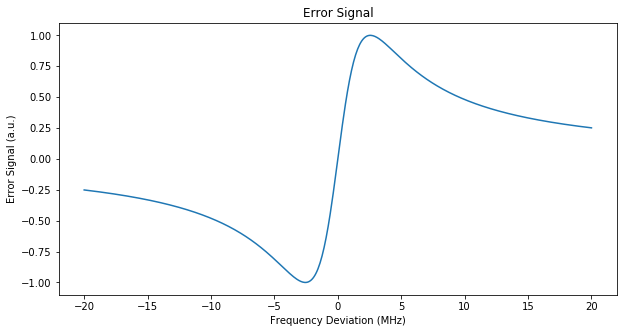

In [56]:
plot_errsig_2(dw_range=np.linspace(-20, 20, 500), phasediff=0, loss=1)

$$
\text{Error Signal} \propto \sin{\Delta \phi}\sqrt{I(\Delta \omega)}t^{2}\frac{\sin{n\Delta \omega L/c}}{1+r^{2}\mathcal{L}^{2} - 2r\mathcal{L}\cos{n\Delta \omega L/c}}
$$

In [72]:
def plot_errsig(dw_range, phasediff, loss, r=np.sqrt(0.95), nfiber=1.5, Lfiber=2, c=2.998e8):
    # dw_range is MHz
    para1 = r - (1 - r**2) * (np.exp(-1j*nfiber*dw_range*Lfiber/c*1e6)) / (1 - r*loss*np.exp(-1j*nfiber*dw_range*Lfiber/c*1e6))
    errsig = np.sin(phasediff) * np.sqrt(para1 * para1.conjugate()) * (1 - r**2) * (
                (np.sin(nfiber*dw_range*Lfiber/c*1e6))/(1 + r**2 * loss**2 - 2*r*loss*np.cos(nfiber*dw_range*Lfiber/c*1e6)))
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(dw_range, errsig, '-')
    ax.set_title('Error Signal')
    ax.set_xlabel('Frequency Deviation (MHz)')
    ax.set_ylabel('Error Signal (a.u.)')
    plt.show()

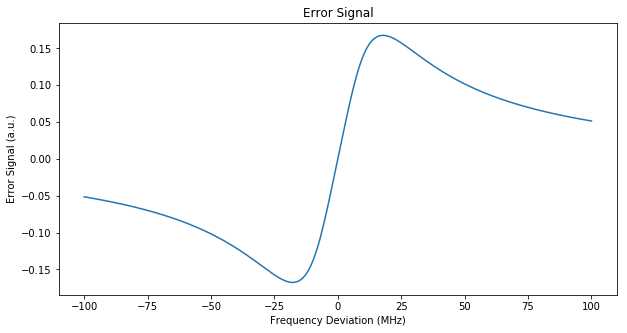

In [73]:
plot_errsig(dw_range=np.linspace(-100, 100, 500), phasediff=np.pi/2, loss=0.887)